In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
#importing the dataset
df=pd.read_csv('Breast_Cancer_dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [22]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [24]:
df.shape

(569, 33)

In [25]:
#Dropping features id and Unnamed as in id for each record there is unique value and unnamed is null in each record
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)
df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [26]:
numerical_cols = df.select_dtypes(include=np.number)
categorical_cols = df.select_dtypes('object')

In [27]:
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [39]:
stats = numerical_cols.describe().T
stats['Median'] = np.median(numerical_cols)
stats['Skewness'] = numerical_cols.skew()
stats

,count,mean,std,min,25%,50%,75%,max,Median,Skewness
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000,0.1811,0.942380
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000,0.1811,0.650450
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000,0.1811,0.990650
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000,0.1811,1.645732
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340,0.1811,0.456324
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540,0.1811,1.190123
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680,0.1811,1.401180
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120,0.1811,1.171180
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400,0.1811,0.725609
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744,0.1811,1.304489


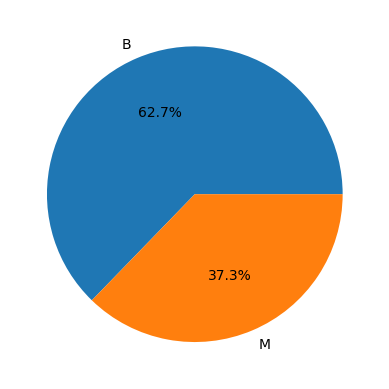

In [37]:
#Plotting pie chart for the feature diagnosis
total_values = df['diagnosis'].value_counts()
plt.pie(total_values,labels=total_values.index,autopct='%1.1f%%')
plt.show()

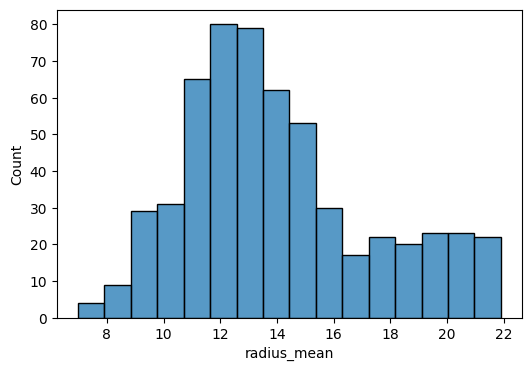

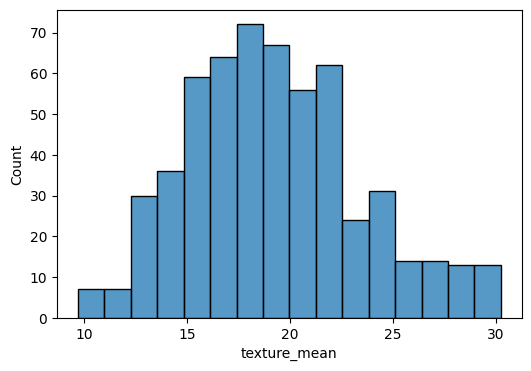

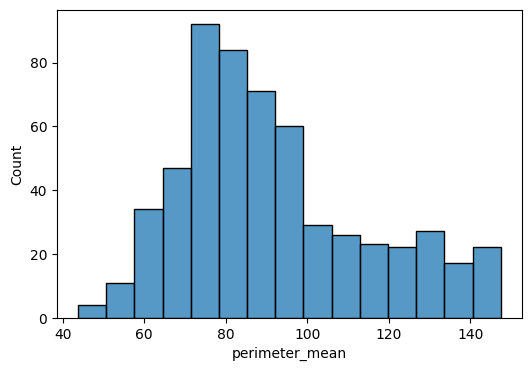

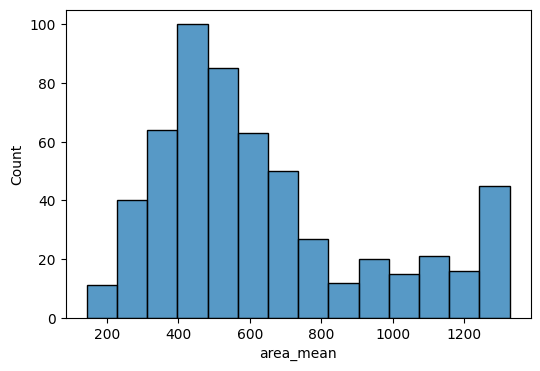

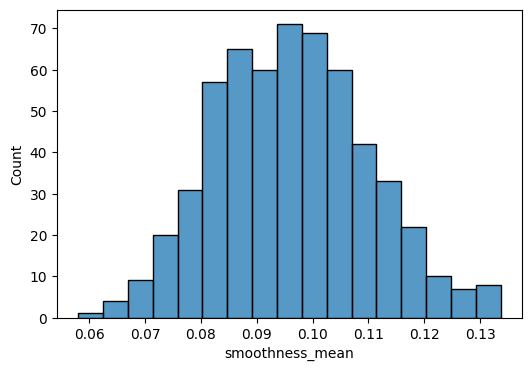

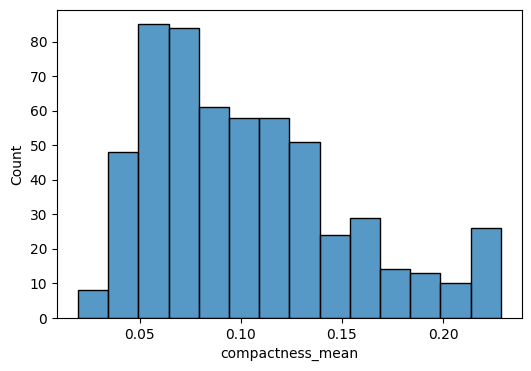

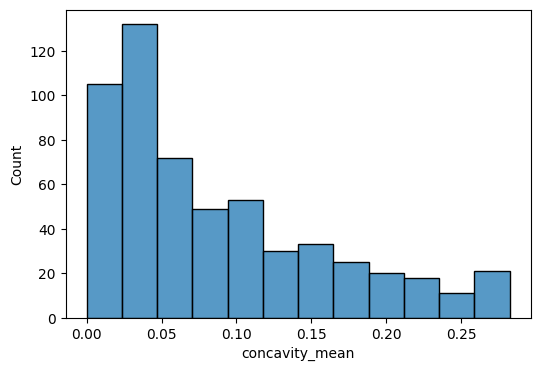

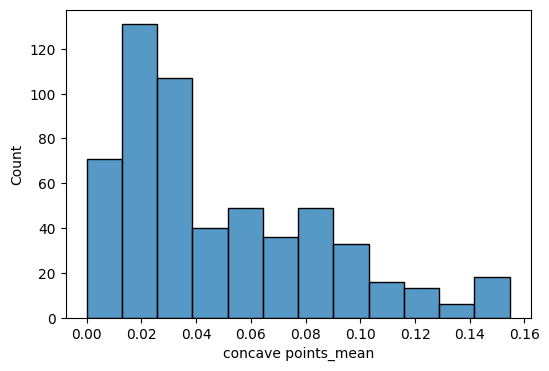

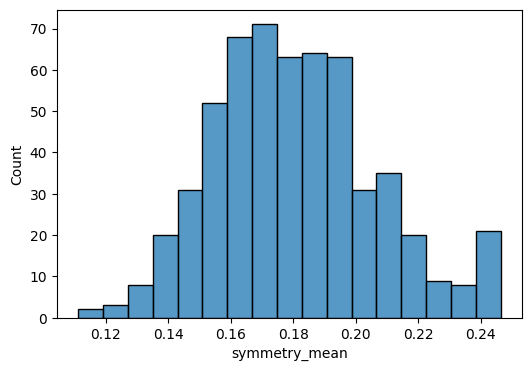

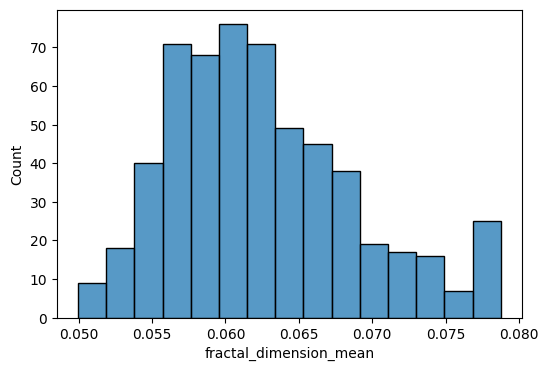

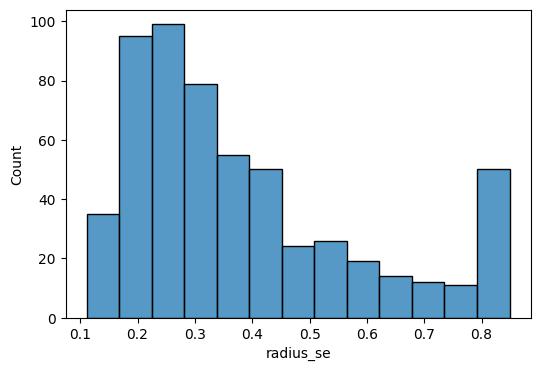

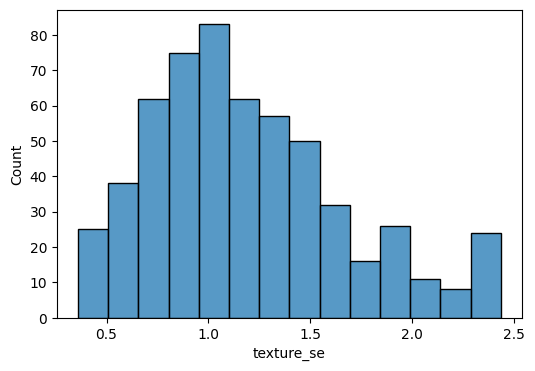

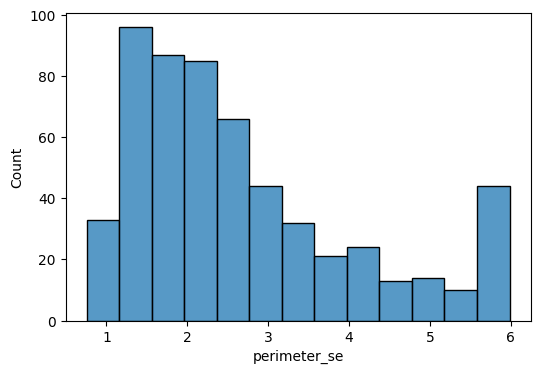

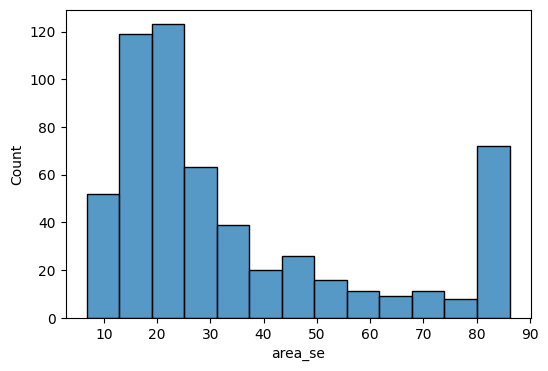

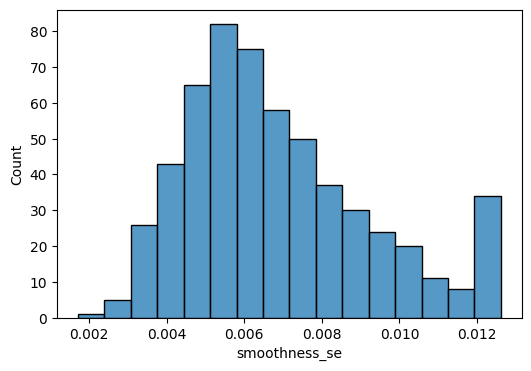

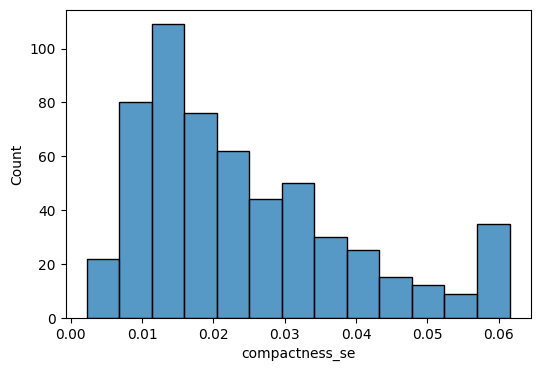

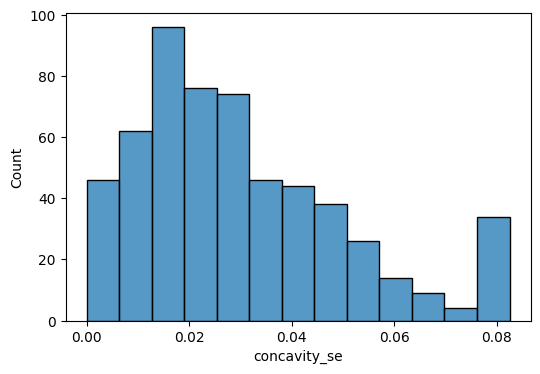

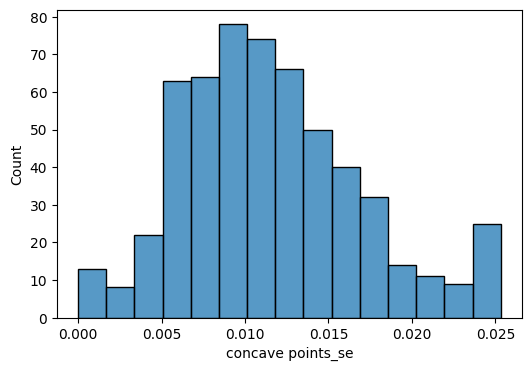

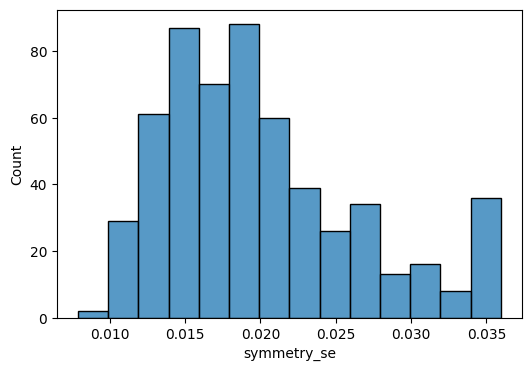

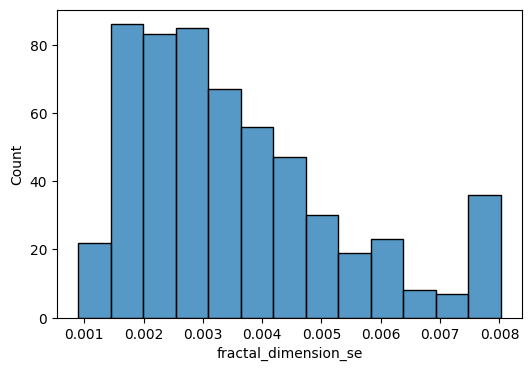

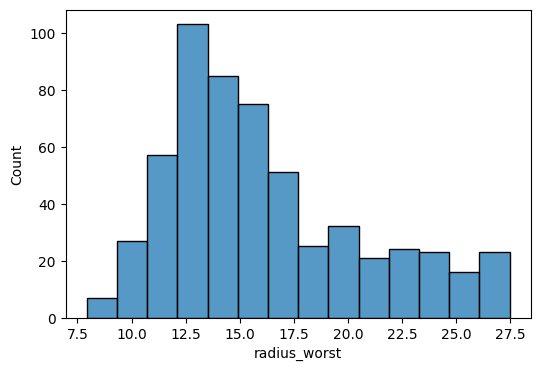

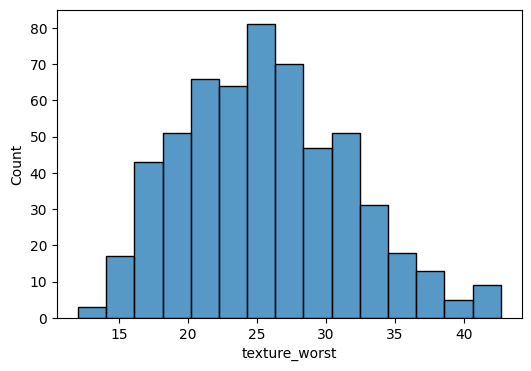

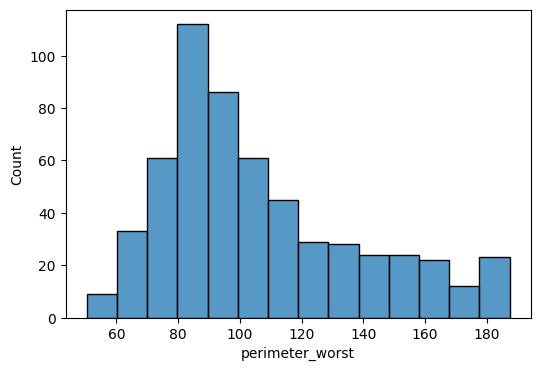

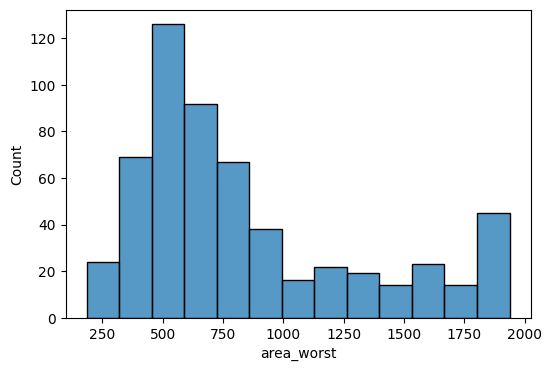

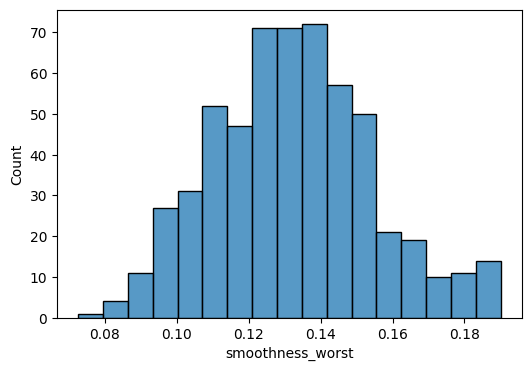

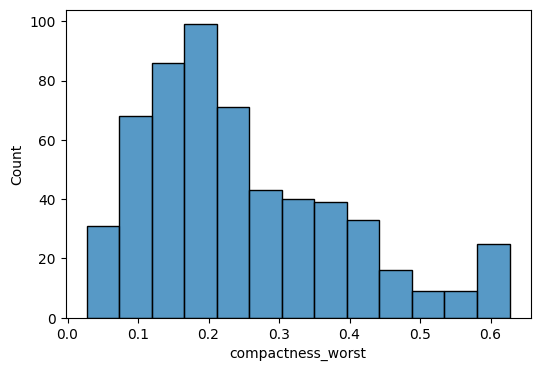

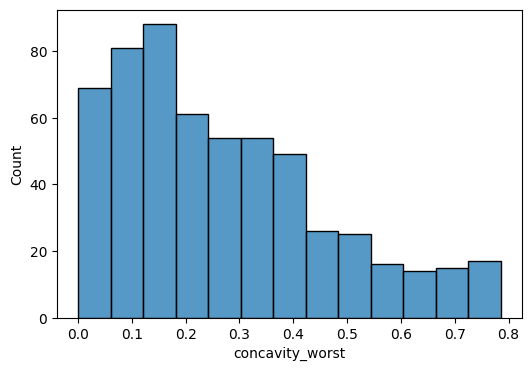

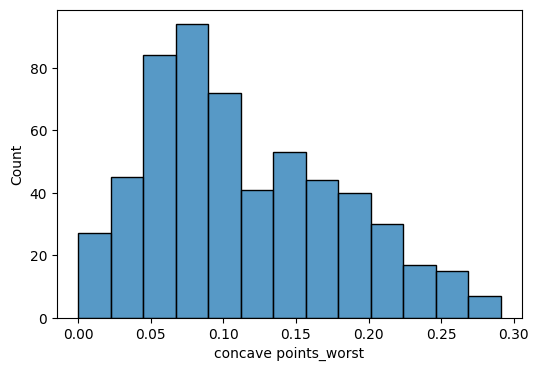

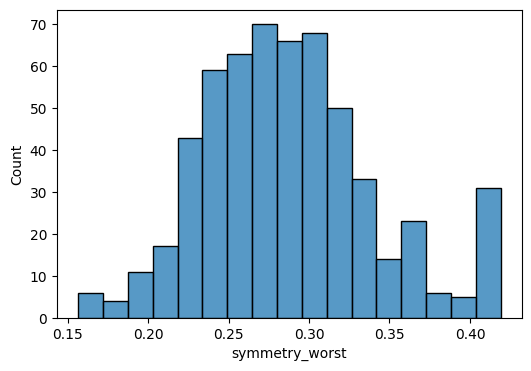

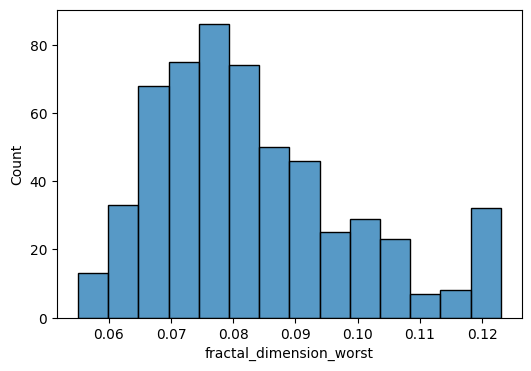

In [43]:
#Visualising distribution of all numeric features
for col in numerical_cols.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col])
    plt.show()

Many features are right skewed

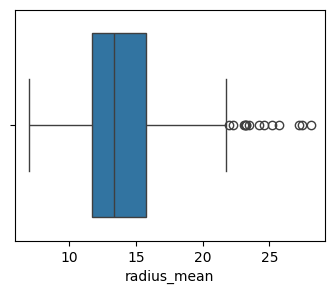

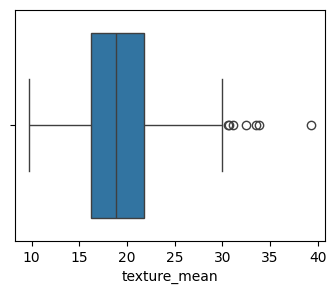

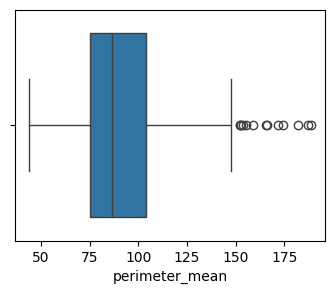

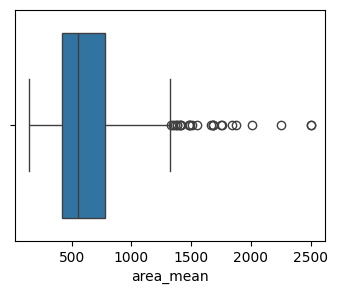

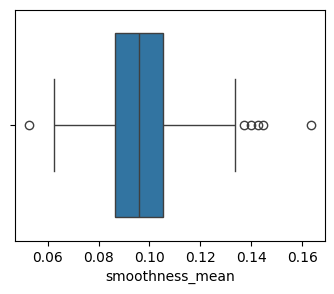

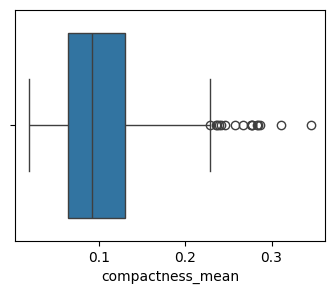

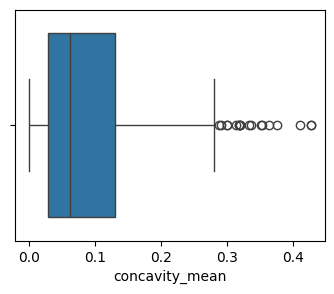

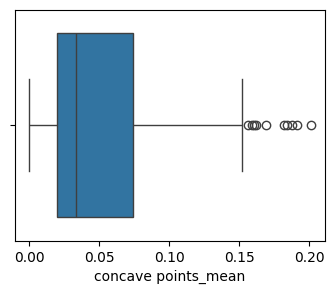

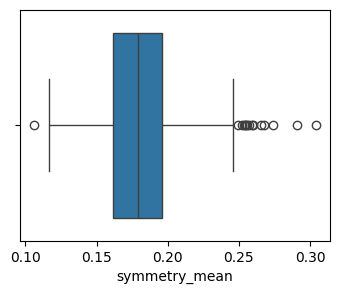

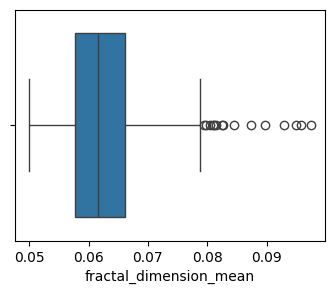

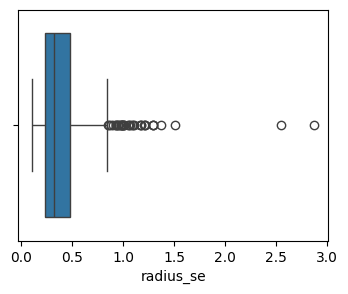

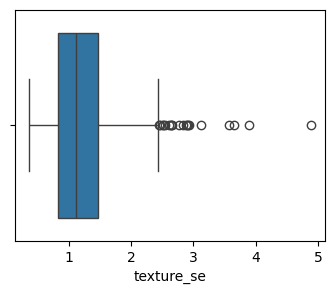

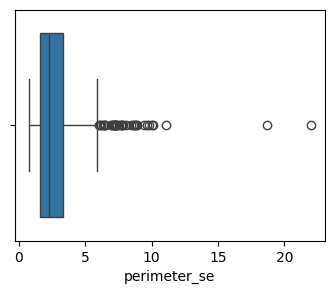

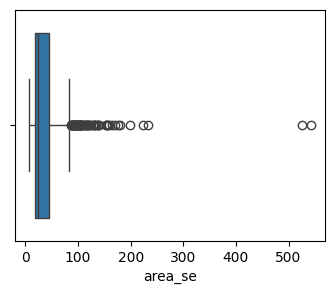

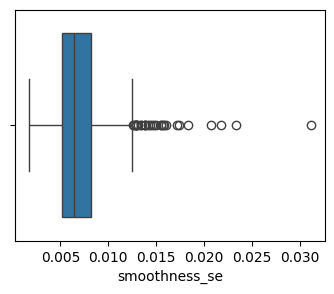

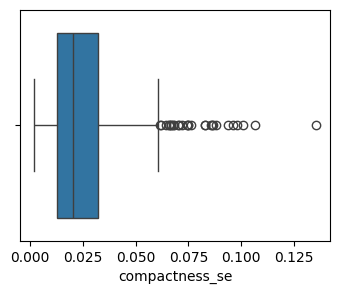

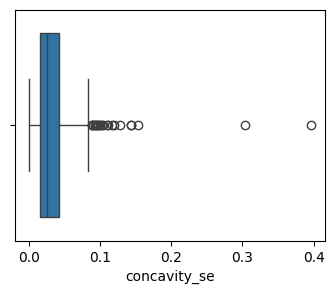

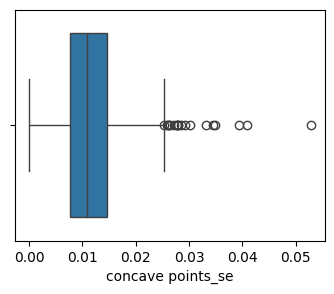

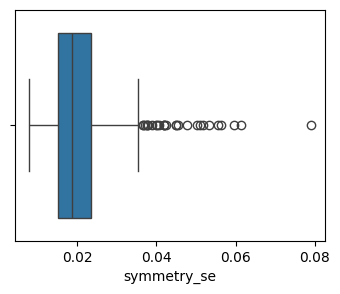

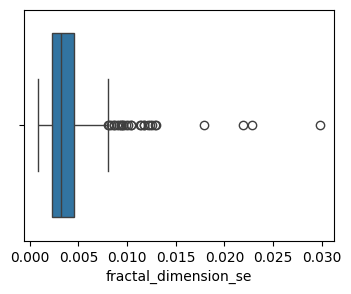

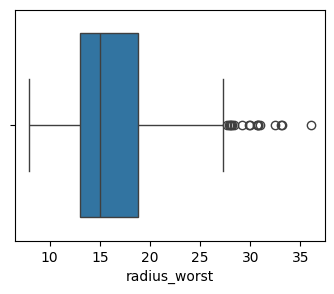

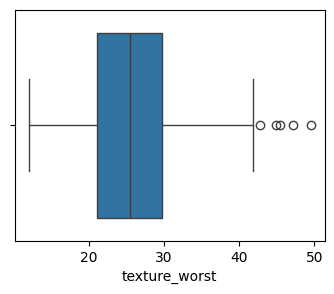

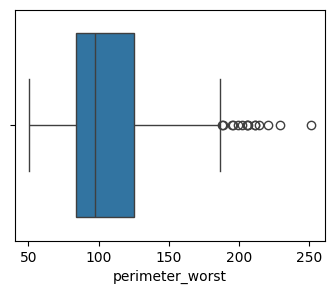

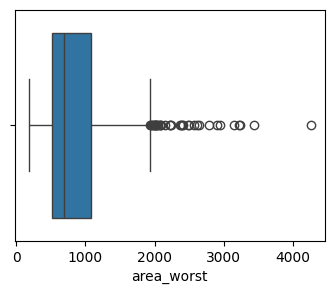

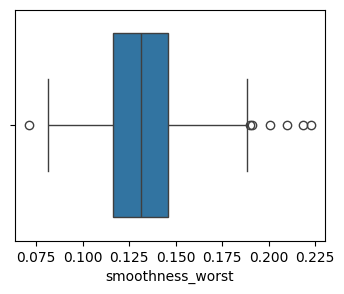

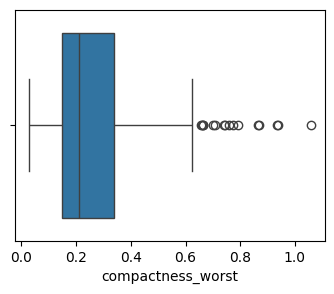

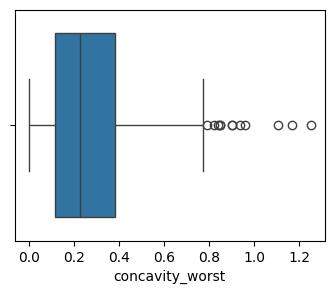

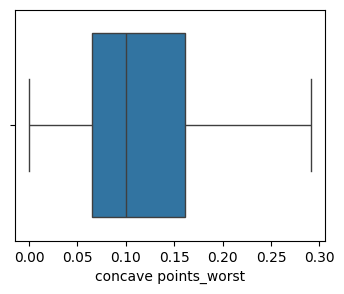

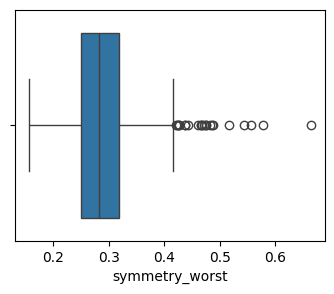

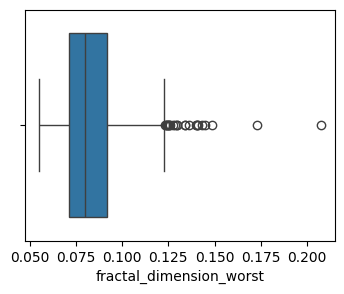

In [33]:
#Checking for outliers
for col in numerical_cols.columns:
    plt.figure(figsize=(4,3))
    sns.boxplot(x=df[col])
    plt.show()

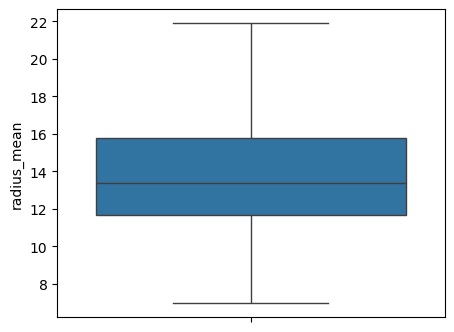

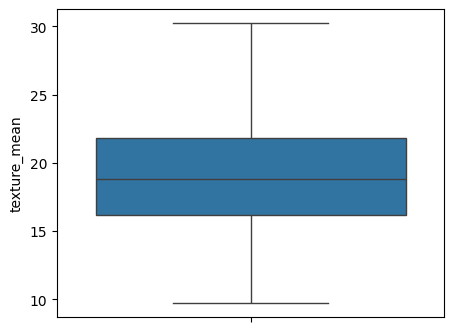

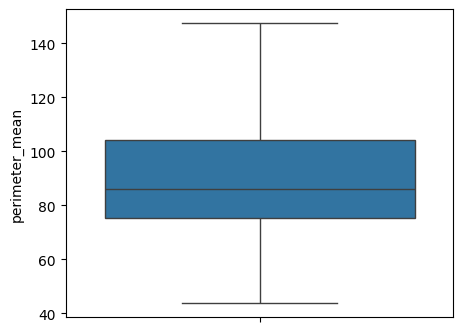

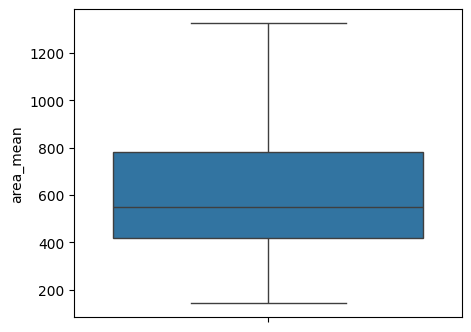

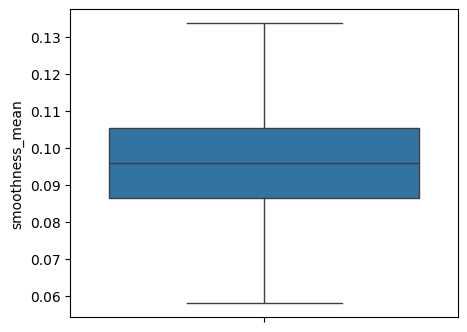

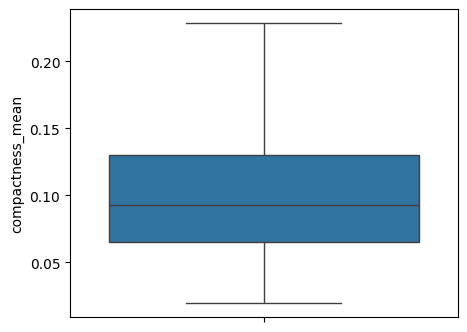

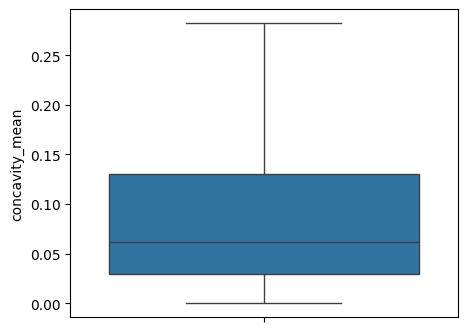

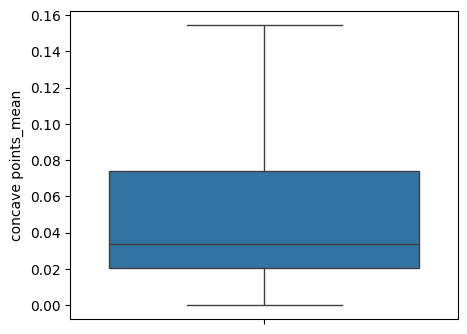

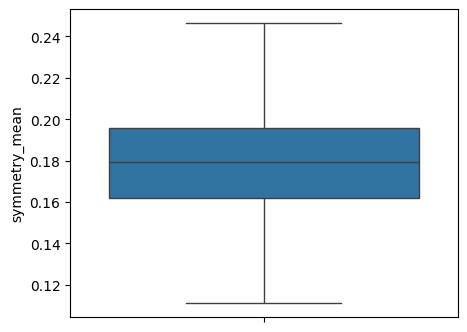

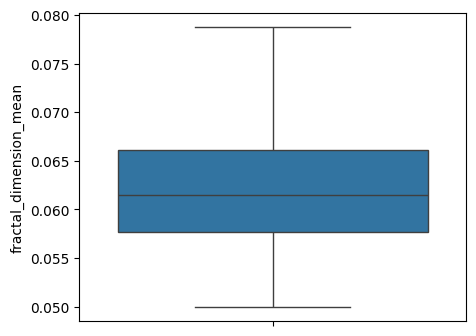

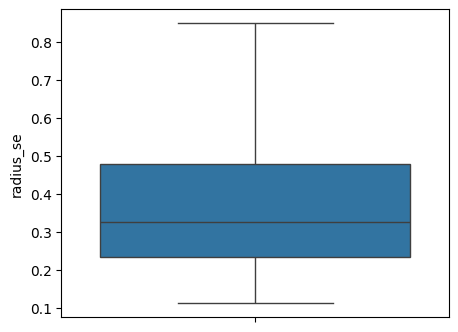

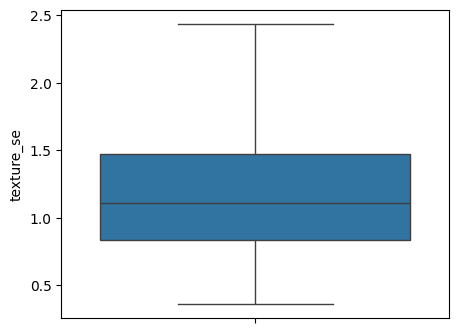

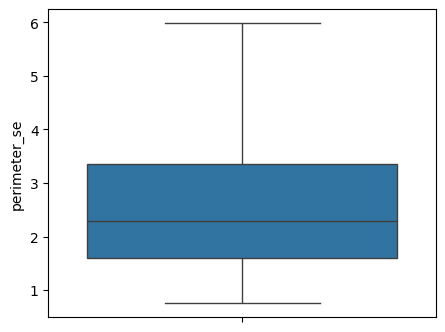

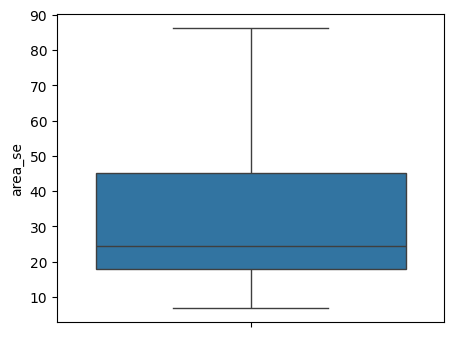

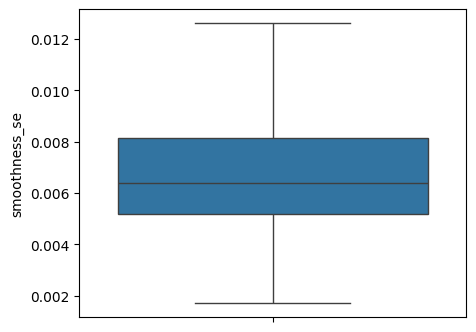

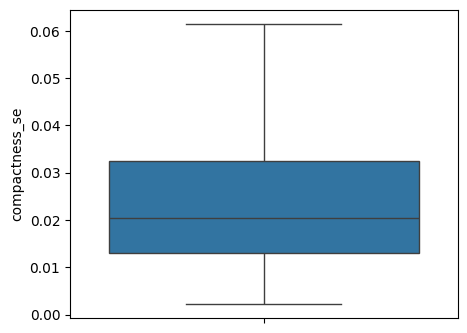

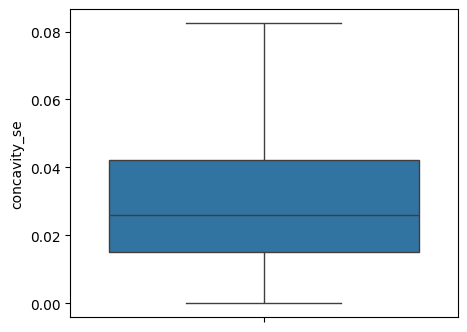

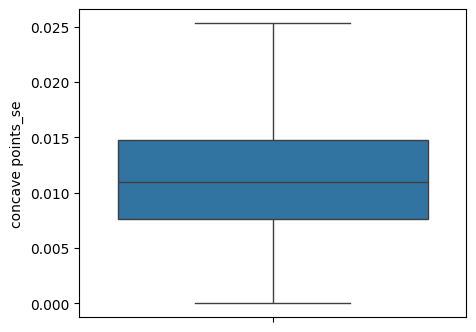

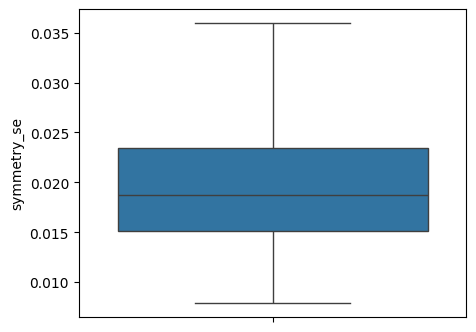

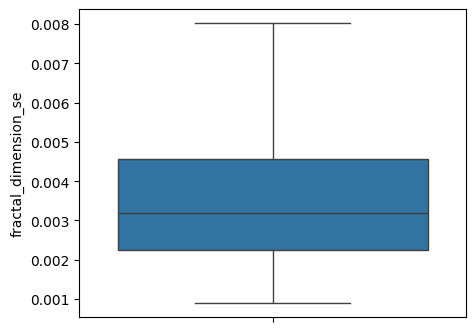

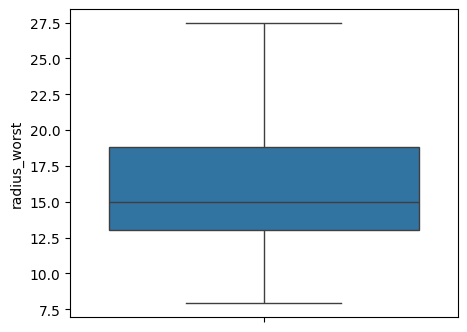

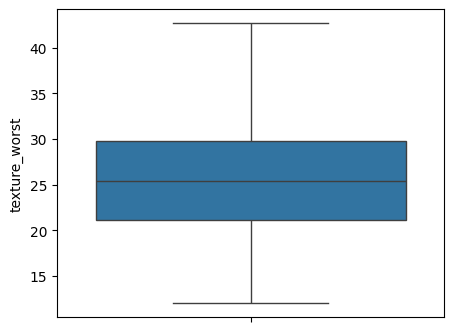

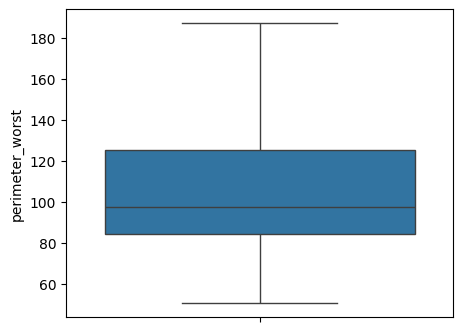

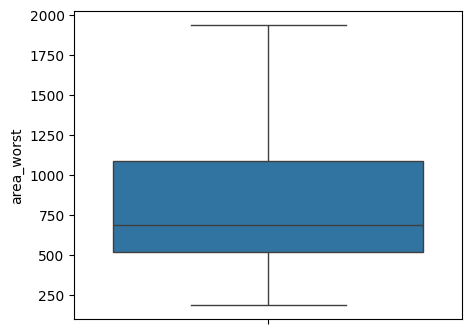

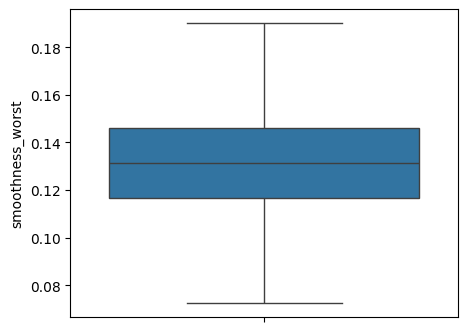

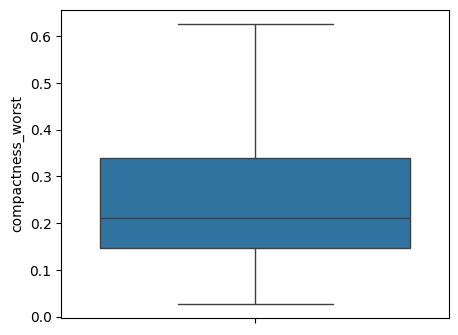

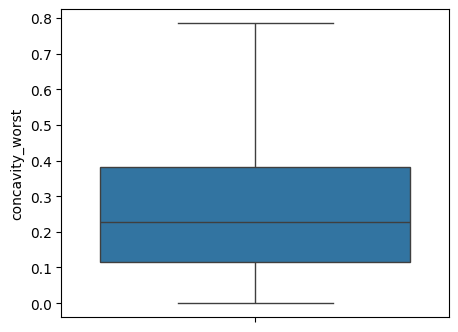

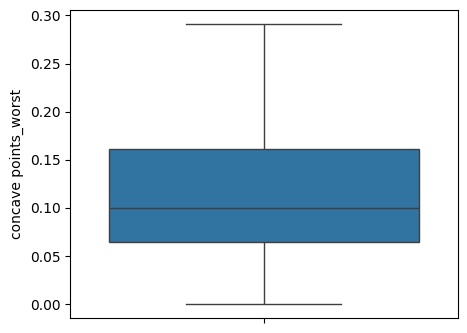

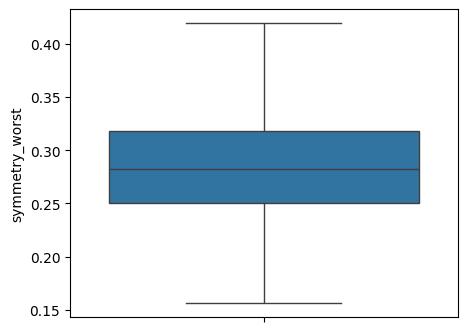

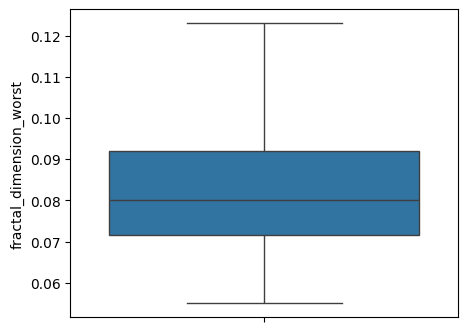

In [42]:
#handling outliers
for col in numerical_cols.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_limit, upper_limit, np.where(df[col] < lower_limit, lower_limit, df[col]))
    plt.figure(figsize=(5,4))
    sns.boxplot(df[col])
    plt.show()


Distribution of numerical features after handling skewness:


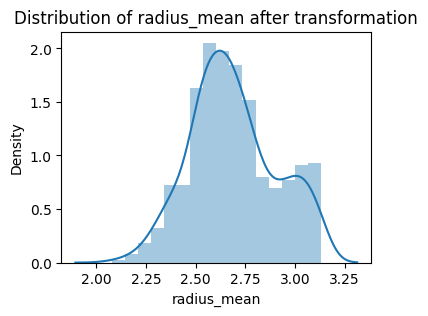

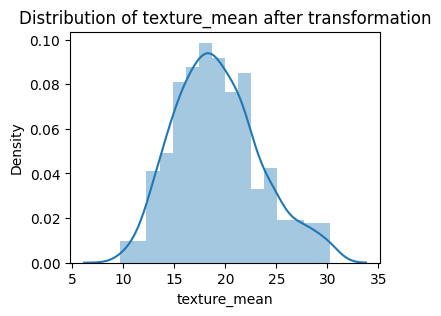

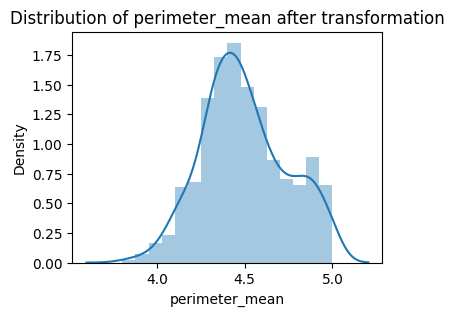

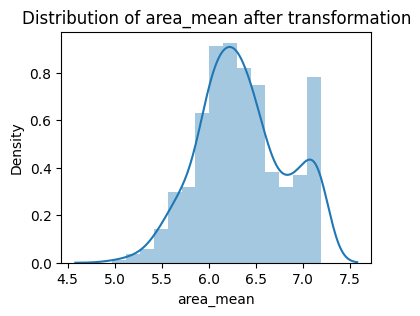

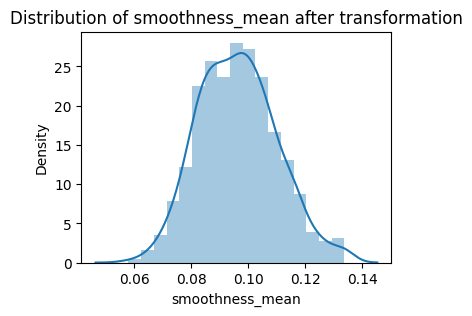

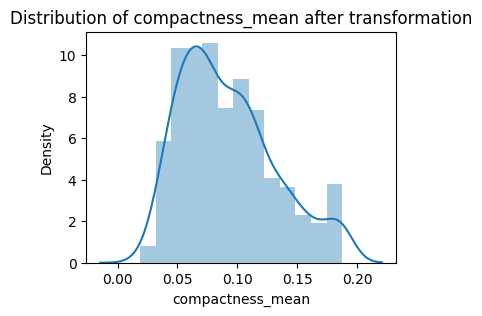

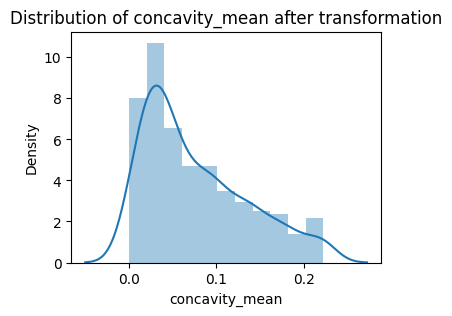

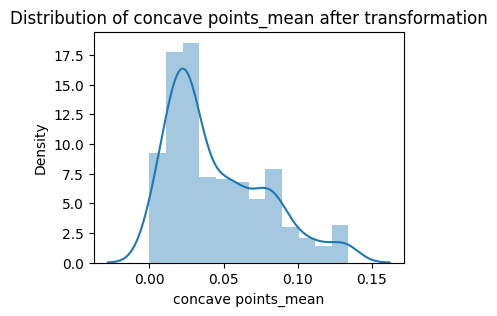

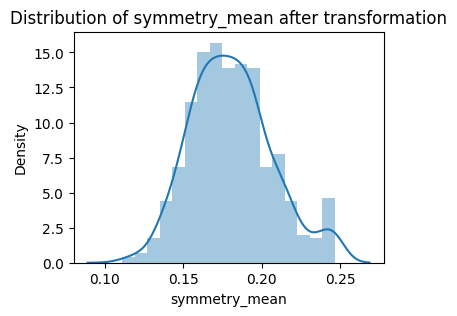

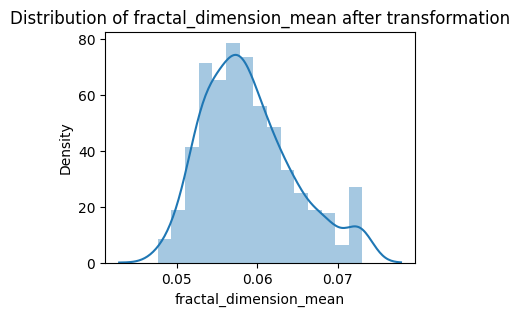

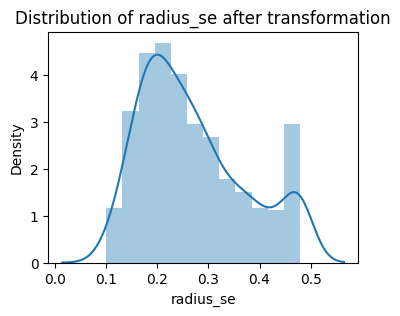

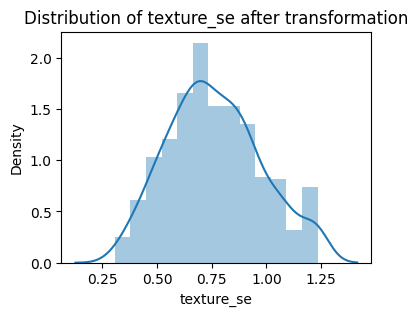

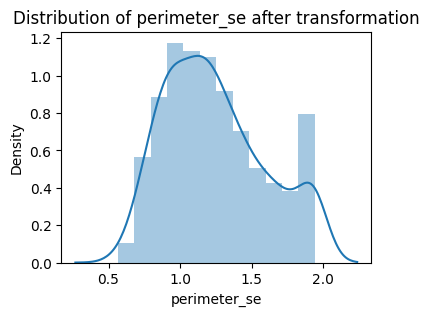

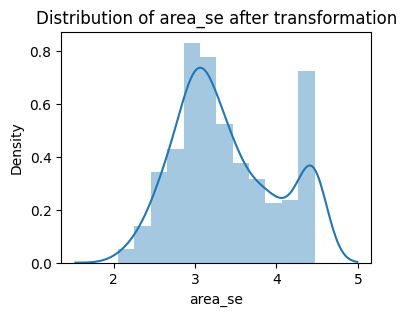

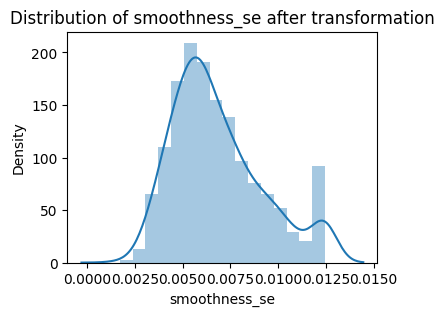

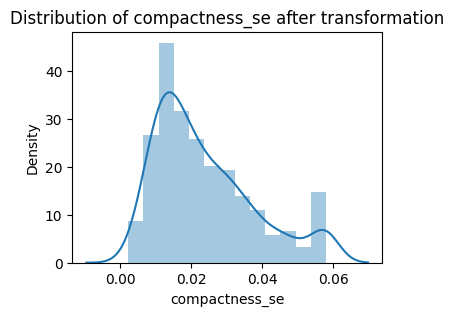

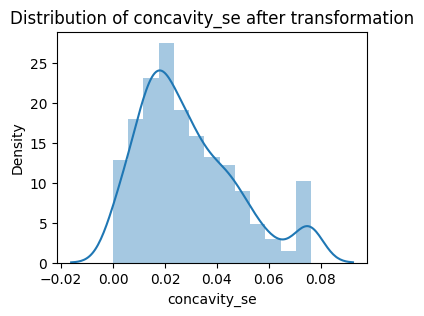

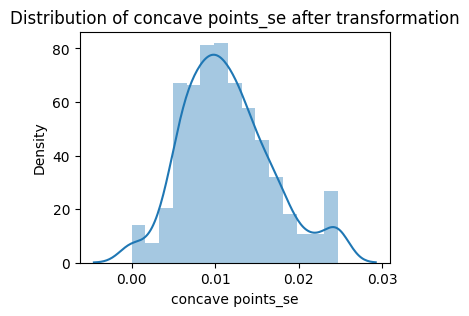

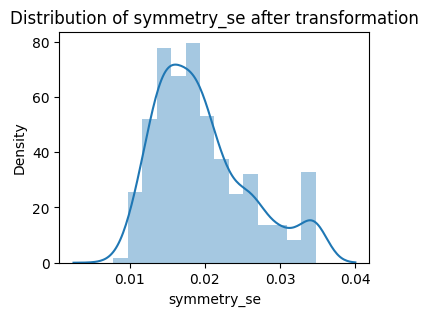

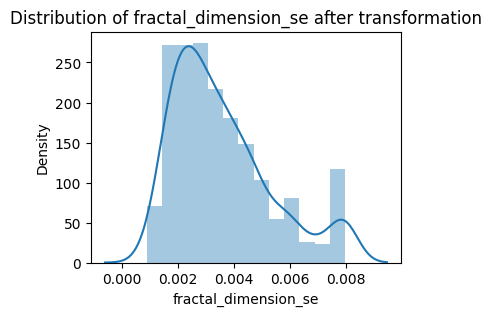

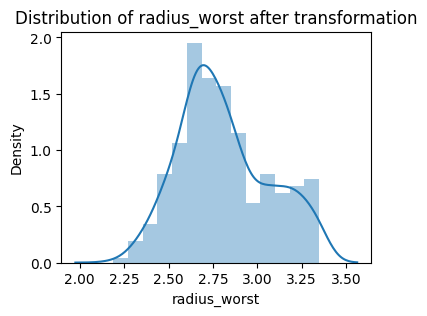

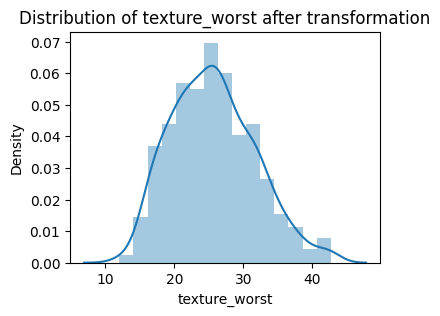

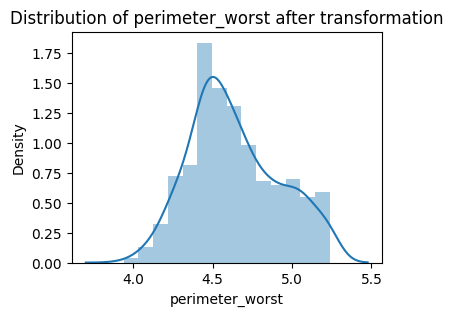

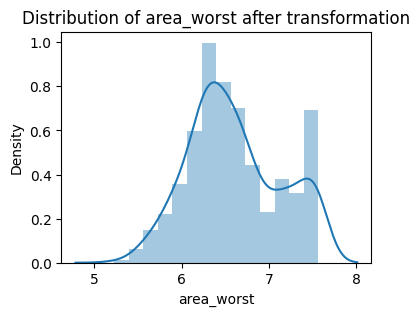

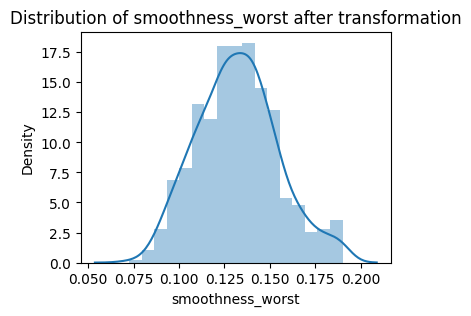

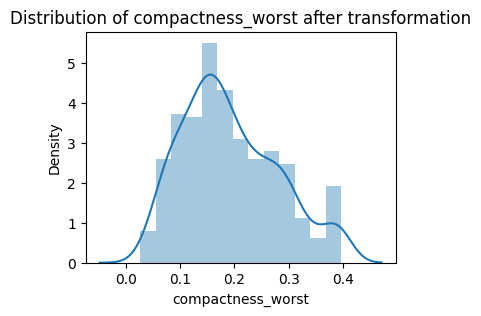

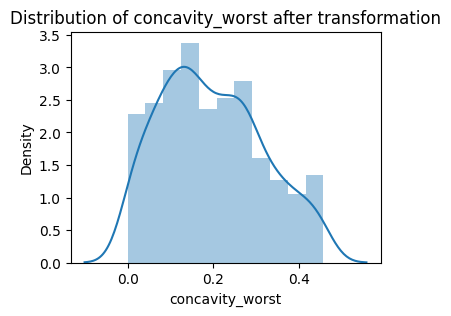

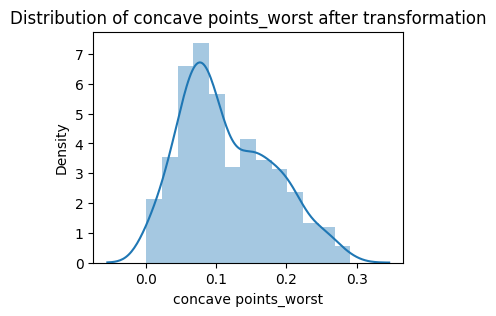

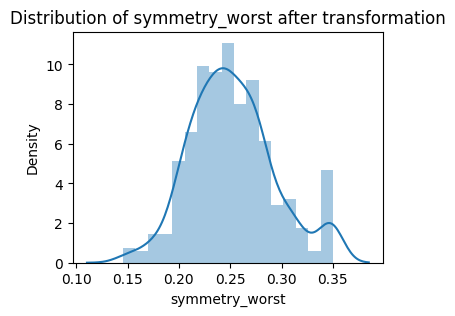

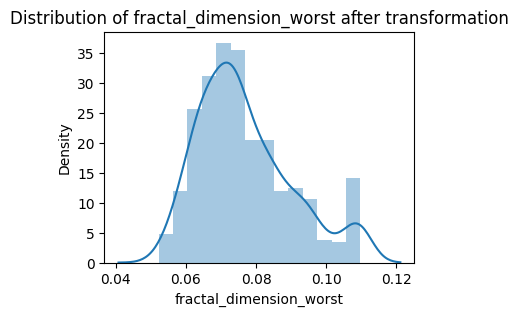


Stats after handling skewness:


,0
radius_mean,0.204835
texture_mean,0.449700
perimeter_mean,0.195553
area_mean,0.089272
smoothness_mean,0.257712
compactness_mean,0.660618
concavity_mean,0.820436
concave points_mean,0.879432
symmetry_mean,0.403621
fractal_dimension_mean,0.655131


In [45]:
# Handling skewness of numerical features
for col in numerical_cols.columns:
    skewness = df[col].skew()
    if skewness > 0.5 or skewness < -0.5:
        if skewness > 0:
            df[col] = np.log1p(df[col])


# Re-visualizing distribution of numerical features after handling skewness
print("\nDistribution of numerical features after handling skewness:")
for col in numerical_cols.columns:
    plt.figure(figsize=(4,3))
    sns.distplot(df[col])
    plt.title(f'Distribution of {col} after transformation')
    plt.show()

# Re-calculating skewness after transformation
skewness = df[numerical_cols.columns].skew()
print("\nStats after handling skewness:")
skewness

In [65]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['diagnosis'] = label.fit_transform(df['diagnosis'])

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, precision_score, recall_score,
                             roc_auc_score, roc_curve)

In [67]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [68]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [70]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

In [71]:
#Checking accuracy of the model
accucary = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9824561403508771


In [72]:
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[70  1]
 [ 1 42]]


In [73]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [82]:
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

Precision Score: 0.9767441860465116
Recall Score: 0.9767441860465116
ROC AUC Score: 0.981329839502129


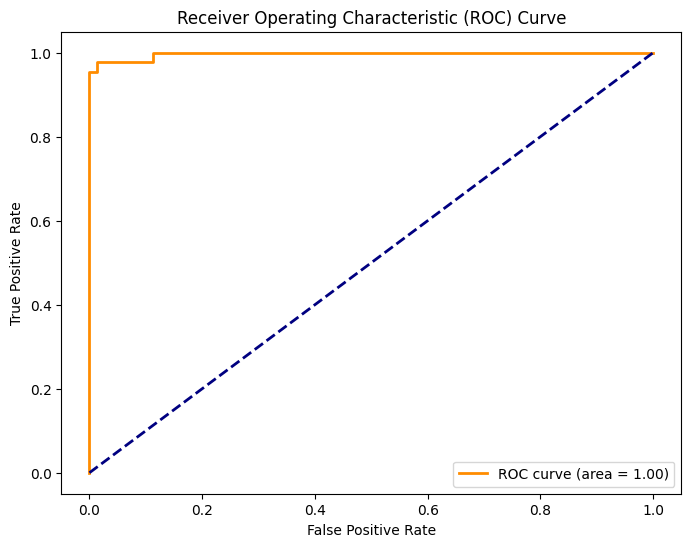

In [79]:
# Plotting ROC AUC curve
# Get predicted probabilities for the positive class
y_pred_proba = logistic.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

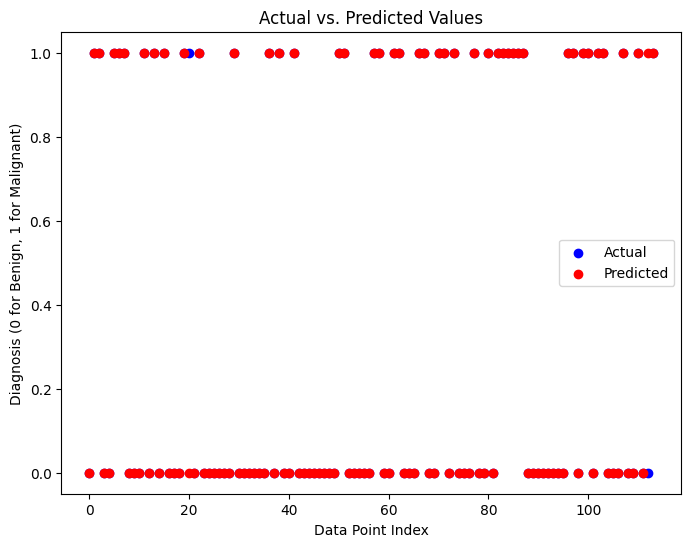

In [81]:
#Visualising predicted vs actual points
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point Index')
plt.ylabel('Diagnosis (0 for Benign, 1 for Malignant)')
plt.legend()
plt.show()

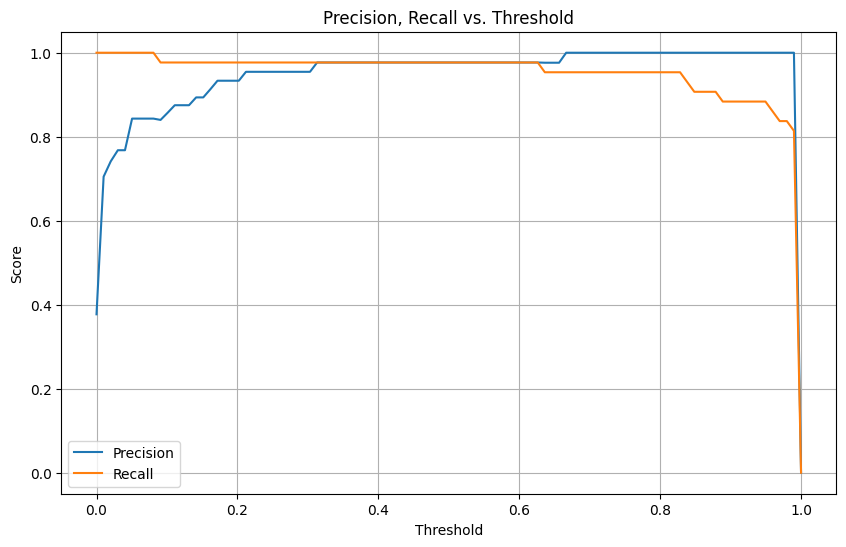

In [87]:
# Tuning threshold for better balance between precision and recall
# We can iterate through different thresholds and see how the metrics change
thresholds = np.linspace(0, 1, 100)
precision_scores = []
recall_scores = []
f1_scores = []

for threshold in thresholds:
    y_pred_tuned = (y_pred_proba >= threshold).astype(int)
    precision_scores.append(precision_score(y_test, y_pred_tuned))
    recall_scores.append(recall_score(y_test, y_pred_tuned))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [89]:
# Example of applying a chosen threshold
optimal_threshold = 0.4
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
print("\nMetrics with optimal threshold:")
print("Precision Score:", precision_score(y_test, y_pred_optimal))
print("Recall Score:", recall_score(y_test, y_pred_optimal))


Metrics with optimal threshold:
Precision Score: 0.9767441860465116
Recall Score: 0.9767441860465116


The metrices are nearly same before and after the threshold tuning.

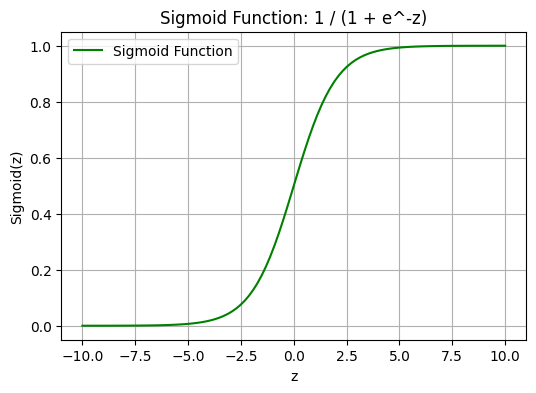

In [78]:
#Explaining sigmoid function
x_vals = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-x_vals))

plt.figure(figsize=(6, 4))
plt.plot(x_vals, sigmoid, label="Sigmoid Function", color="green")
plt.title("Sigmoid Function: 1 / (1 + e^-z)")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid(True)
plt.legend()
plt.show()